In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [2]:
root = Path.cwd().parent

simple_results_dir = root / "RESULTS_simple" / "results"
simple_results_csv = simple_results_dir / "resultsCV.csv" 

df = pd.read_csv(simple_results_csv)

C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_37564\1164342159.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['Group'] = 'Variance Threshold Applied'
C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_37564\1164342159.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['Group'] = 'All Features Retained'


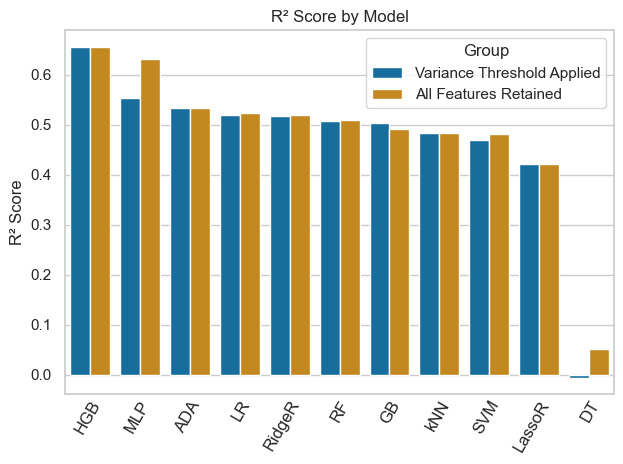

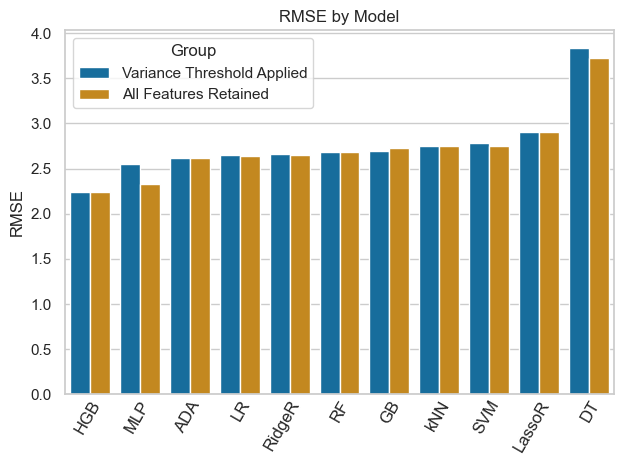

In [3]:
# Visulizing Effect of Applying Variance Threshold
# Set style
sns.set(style="whitegrid")
palette_r2 = 'colorblind'
palette_rmse = 'colorblind'

# Filter Group 1: lowVarianceDrop = TRUE
group1 = df[df['lowVarianceDrop'] == True]

# Filter Group 2: lowVarianceDrop = FALSE AND rfecv, kbest, autospearman = FALSE
group2 = df[
    (df['lowVarianceDrop'] == False) &
    (df['rfecv'] == False) &
    (df['kbest'] == False) &
    (df['autospearman'] == False) &
    (df['dropExecTime'] == False)
]

group1['Group'] = 'Variance Threshold Applied'
group2['Group'] = 'All Features Retained'

combined = pd.concat([group1, group2], ignore_index=True)

model_order = (
combined.groupby("model_name")["r2"]
.mean()
.sort_values(ascending=False)
.index.tolist()
)

# --- R² Plot ---
# plt.figure(figsize=(6.4, 4.8))
sns.barplot(data=combined, x="model_name", y="r2", hue="Group", order=model_order, palette=palette_r2)
plt.ylabel("R² Score")
plt.xlabel(None)
plt.title("R² Score by Model")
plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)
plt.tight_layout()
# plt.savefig(os.path.join(plots_path, 'r2_by_model.pdf'), format='pdf', bbox_inches='tight')
plt.show()

# --- RMSE Plot ---
# plt.figure(figsize=(6.4, 4.8))
sns.barplot(data=combined, x="model_name", y="rmse", hue="Group", order=model_order, palette=palette_rmse)
plt.ylabel("RMSE")
plt.xlabel(None)
plt.title("RMSE by Model")
plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)
plt.tight_layout()
# plt.savefig(os.path.join(plots_path, 'rmse_by_model.pdf'), format='pdf', bbox_inches='tight')
plt.show()


C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_37564\2091595187.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['Group'] = 'Excluding Execution Time'
C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_37564\2091595187.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['Group'] = 'Including Execution Time'


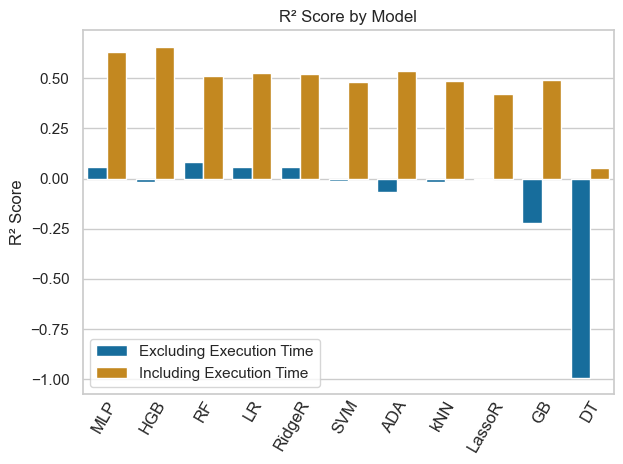

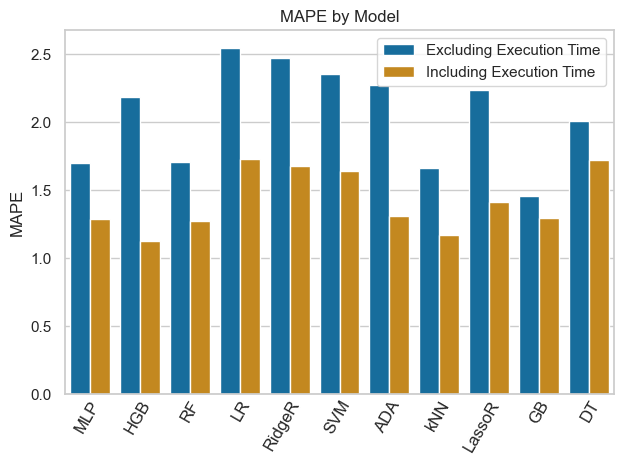

In [4]:
# Set style
sns.set(style="whitegrid")
palette_r2 = 'colorblind'
palette_rmse = 'colorblind'

# Filter Group 1: with dropExecTime = True
group1 = df[df['dropExecTime'] == True]


# Filter Group 2: dropExecTime = FALSE AND rfecv, kbest, autospearman = FALSE
group2 = df[
    (df['lowVarianceDrop'] == False) &
    (df['rfecv'] == False) &
    (df['kbest'] == False) &
    (df['autospearman'] == False) &
    (df['dropExecTime'] == False)
]

group1['Group'] = 'Excluding Execution Time'
group2['Group'] = 'Including Execution Time'

combined = pd.concat([group1, group2], ignore_index=True)

model_order = (
combined.groupby("model_name")["r2"]
.mean()
.sort_values(ascending=False)
.index.tolist()
)

# --- R² Plot ---
# plt.figure(figsize=(6.4, 4.8))
sns.barplot(data=combined, x="model_name", y="r2", hue="Group", order=model_order, palette=palette_r2)
plt.ylabel("R² Score")
plt.xlabel(None)
plt.title("R² Score by Model")
plt.legend(title=None)
plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)
plt.tight_layout()
# plt.savefig(os.path.join(plots_path, 'r2_by_model.pdf'), format='pdf', bbox_inches='tight')
plt.show()

# --- RMSE Plot ---
# plt.figure(figsize=(6.4, 4.8))
sns.barplot(data=combined, x="model_name", y="mape", hue="Group", order=model_order, palette=palette_rmse)
plt.ylabel("MAPE")
plt.xlabel(None)
plt.title("MAPE by Model")
plt.legend(title=None)
plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tick_params(axis='x', which='major', pad=-3.5)
plt.tight_layout()
# plt.savefig(os.path.join(plots_path, 'rmse_by_model.pdf'), format='pdf', bbox_inches='tight')
plt.show()


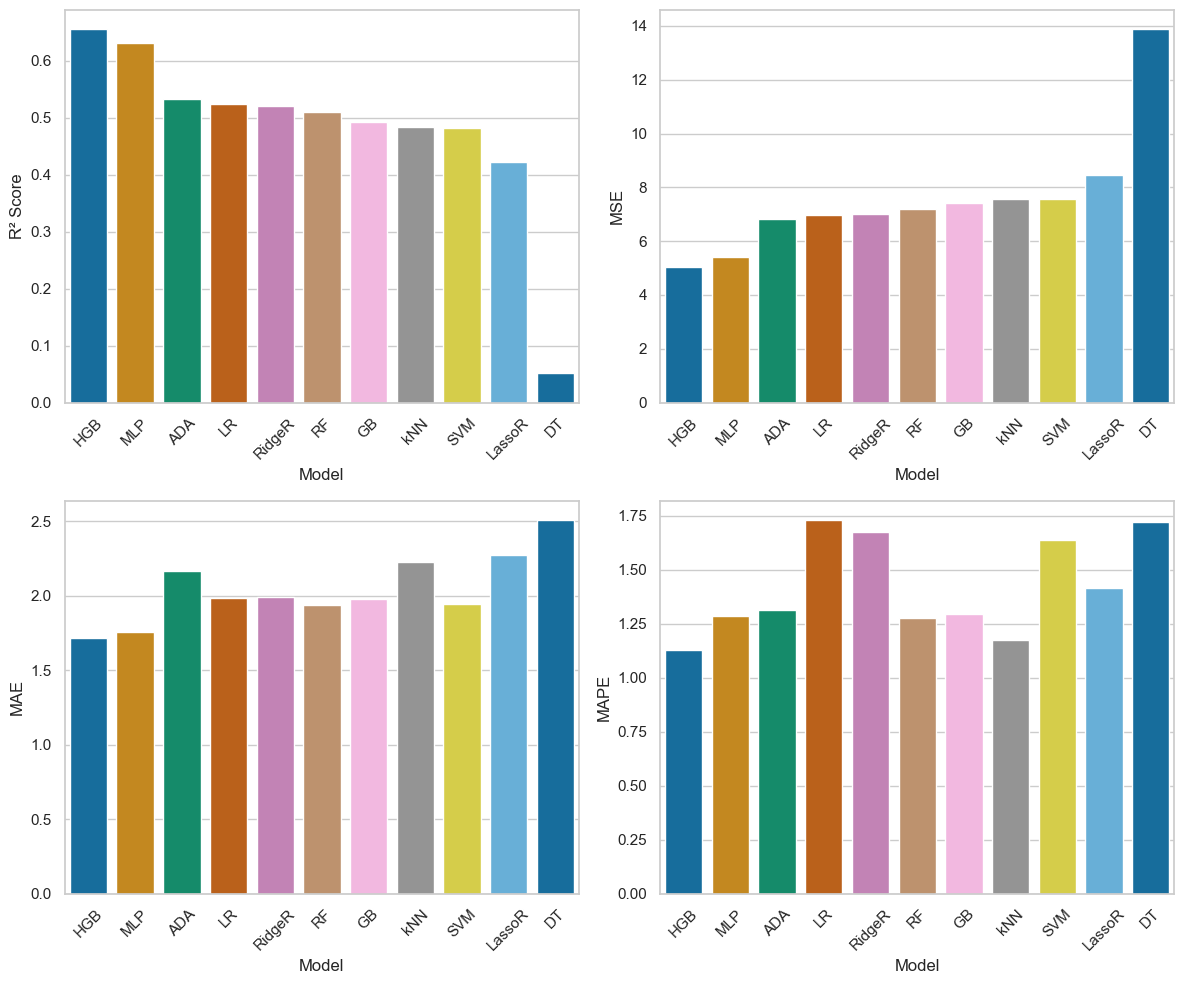

In [5]:
# Filter: all methods/features off
filtered_df = df[
    (df["lowVarianceDrop"] == False) &
    (df["dropExecTime"] == False) &
    (df["rfecv"] == False) &
    (df["kbest"] == False) &
    (df["autospearman"] == False) &
    (df["hyperparameters"] == False)
]

# Sort by R² descending
filtered_df = filtered_df.sort_values(by="r2", ascending=False)

# Set seaborn style
sns.set(style="whitegrid")
palette = 'colorblind'

# Create 2×2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Metrics and labels
metrics = ["r2", "mse", "mae", "mape"]
y_labels = ["R² Score", "MSE", "MAE", "MAPE"]

# Plot each subplot
for ax, metric, y_label in zip(axes.flat, metrics, y_labels):
    sns.barplot(x="model_name", y=metric, data=filtered_df, palette=palette, ax=ax)
    ax.set_xlabel("Model")
    ax.set_ylabel(y_label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Save plot
# plt.savefig("plt_RQ3A-Grid_Regression.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.show()
